# Module loading and function defined

In [1]:
import mlrose_hiive
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
from IPython.display import display
import IPython.display as ipd
import mlrose_hiive
from functools import partial
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.decomposition import PCA, FactorAnalysis, NMF
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest

# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*np.sin(2*np.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound
random_seed = 56

In [2]:
# =================== diabetes =========================
# load file
diabetes_dataset = pd.read_csv("diabetes.csv")

# check if there's any NA for both files, if yes, then drop
diabetes_dataset.isnull().any().any()
diabetes_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
# print("diabetes information:", diabetes_dataset.info())

# remove unnecessary column
cleaned_diabetes_data = diabetes_dataset.drop(columns = ["PatientID"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_diabetes_data.values)
cleaned_diabetes_data = pd.DataFrame(normalized, columns = cleaned_diabetes_data.columns)
# print(cleaned_diabetes_data.shape)
cleaned_diabetes_data.head(n = 10)

diabetes_X = cleaned_diabetes_data.copy(deep= True).drop("Diabetic", axis=1)
diabetes_y = cleaned_diabetes_data.copy(deep= True)[["Diabetic"]]

diabetes_X.info(), diabetes_y.info()


# =================== phishing =========================
# load file
phishing_dataset = pd.read_csv("phishing.csv")

# check if there's any NA for both files, if yes, then drop
phishing_dataset.isnull().any().any()
phishing_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
random_seed = 56
# print("phishing information:", phishing_dataset.info())

# remove unnecessary column
cleaned_phishing_data = phishing_dataset.drop(columns = ["Index"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_phishing_data.values)
cleaned_phishing_data = pd.DataFrame(normalized, columns = cleaned_phishing_data.columns)
cleaned_phishing_data.head(n = 10)

# trainng data    
phishing_X = cleaned_phishing_data.copy(deep= True).drop("class", axis=1)
phishing_y = cleaned_phishing_data.copy(deep= True)[["class"]]

phishing_X.info(), phishing_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  float64
 1   PlasmaGlucose           15000 non-null  float64
 2   DiastolicBloodPressure  15000 non-null  float64
 3   TricepsThickness        15000 non-null  float64
 4   SerumInsulin            15000 non-null  float64
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  float64
dtypes: float64(8)
memory usage: 937.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diabetic  15000 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110

(None, None)

In [3]:
phishing_dataset = pd.read_csv("phishing.csv")
diabetes_dataset = pd.read_csv("diabetes.csv")

diabetes_dataset.drop(["PatientID"], axis=1 ,inplace=True)

diabetesX = diabetes_dataset.drop("Diabetic", 1).copy().values
diabetesY = diabetes_dataset["Diabetic"].copy().values
diabetes_x_df = diabetes_dataset.drop("Diabetic",1)


phishing_dataset.drop(["Index"], axis=1 ,inplace=True)
phishingX = phishing_dataset.drop("class", 1).copy().values
phishingY = phishing_dataset["class"].copy().values
phishing_x_df = phishing_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
diabetesX = min_max_scaler.fit_transform(diabetesX)
diabetesX_df = pd.DataFrame(diabetesX, columns=diabetes_x_df.columns)
phishingX = min_max_scaler.fit_transform(phishingX)
phishingX_df = pd.DataFrame(phishingX, columns=phishing_x_df.columns)

## Dimension reduction using IG on datasets

## diabetes

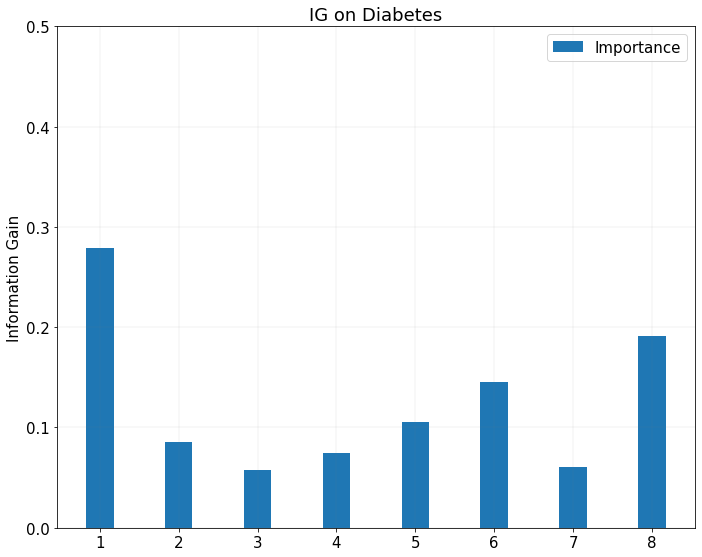

In [19]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

X_diabetes_6 = SelectKBest(chi2, k=6).fit_transform(diabetesX, diabetesY)

ExtraTreesClassifier(n_estimators=50)
clf.fit(diabetesX, diabetesY)
clf.feature_importances_  

algo = np.arange(1, diabetesX_df.shape[1] + 1, 1) 
width = 0.35      
labels = algo
x = np.arange(len(labels))  # the label locations

fig = plt.figure()
ax = fig.add_subplot(111)
rects2 = ax.bar(x, clf.feature_importances_ , width, label='Importance')
ax.set_ylim(bottom=0.0, top=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Information Gain')
ax.set_title('IG on Diabetes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(color='gray', linestyle='-', linewidth=0.1)

fig.tight_layout()

In [25]:
comp = 6
ig = SelectKBest(chi2, k=comp).fit(diabetesX, diabetesY)
ig_results = ig.transform(diabetesX)
# for i in range(comp):
#     key_name = "IG-"+str(i + 1)
#     diabetesX_df[key_name] = ig_results[:,i]
#     diabetes_dataset[key_name] = ig_results[:,i]
# diabetes_ig_6 = ig_results

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="RP-1", 
    y="RP-2",
    hue="Diabetic",
    palette= "deep",
    data = diabetes_dataset,
    legend="full",
    alpha=0.25,
    cmap = "plasma"
)

ValueError: Could not interpret value `RP-1` for parameter `x`

<Figure size 720x576 with 0 Axes>

In [ ]:
rndperm = np.random.permutation(diabetes_dataset.shape[0])
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs = diabetes_dataset.loc[rndperm,:]["RP-1"], 
    ys = diabetes_dataset.loc[rndperm,:]["RP-2"], 
    zs = diabetes_dataset.loc[rndperm,:]["RP-3"], 
    c = diabetes_dataset.loc[rndperm,:]["Diabetic"], 
    cmap='plasma'
)
ax.set_title("RP_diabetes")
ax.set_xlabel('RP-1', fontsize = 15, color = "red")
ax.set_ylabel('RP-2', fontsize = 15, color = "red")
ax.set_zlabel('RP-3', fontsize = 15, color = "red")
plt.show()

## phishing

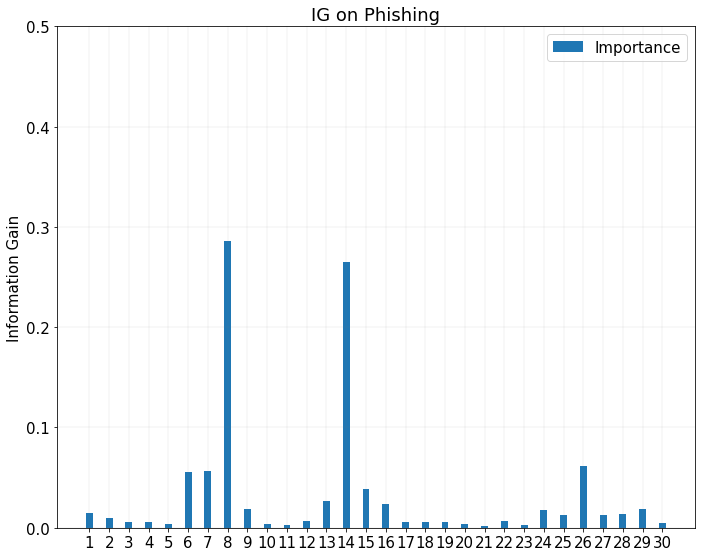

In [31]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

X_phishing_6 = SelectKBest(chi2, k=10).fit_transform(phishingX, phishingY)

ExtraTreesClassifier(n_estimators=50)
clf.fit(phishingX, phishingY)
clf.feature_importances_  

algo = np.arange(1, phishingX_df.shape[1] + 1, 1) 
width = 0.35      
labels = algo
x = np.arange(len(labels))  # the label locations

fig = plt.figure()
ax = fig.add_subplot(111)
rects2 = ax.bar(x, clf.feature_importances_ , width, label='Importance')
ax.set_ylim(bottom=0.0, top=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Information Gain')
ax.set_title('IG on Phishing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(color='gray', linestyle='-', linewidth=0.1)

fig.tight_layout()

In [ ]:
comp = 26
all_rp = GaussianRandomProjection(n_components = comp, random_state = random_seed)
rp_results = all_rp.fit_transform(phishingX_df.values)
for i in range(comp):
    key_name = "RP-"+str(i + 1)
    phishingX_df[key_name] = rp_results[:,i]
    phishing_dataset[key_name] = rp_results[:,i]
phishing_rp_26 = rp_results

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="RP-1", 
    y="RP-2",
    hue="class",
    palette= "deep",
    data = phishing_dataset,
    legend="full",
    alpha=0.25,
    cmap = "plasma"
)

In [ ]:
rndperm = np.random.permutation(phishing_dataset.shape[0])
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs = phishing_dataset.loc[rndperm,:]["RP-1"], 
    ys = phishing_dataset.loc[rndperm,:]["RP-2"], 
    zs = phishing_dataset.loc[rndperm,:]["RP-3"], 
    c = phishing_dataset.loc[rndperm,:]["class"], 
    cmap='plasma'
)
ax.set_title("RP_diabetes")
ax.set_xlabel('RP-1', fontsize = 15, color = "red")
ax.set_ylabel('RP-2', fontsize = 15, color = "red")
ax.set_zlabel('RP-3', fontsize = 15, color = "red")
plt.show()

## Dimension reduction using IG, clustering using K-means

## diabetes

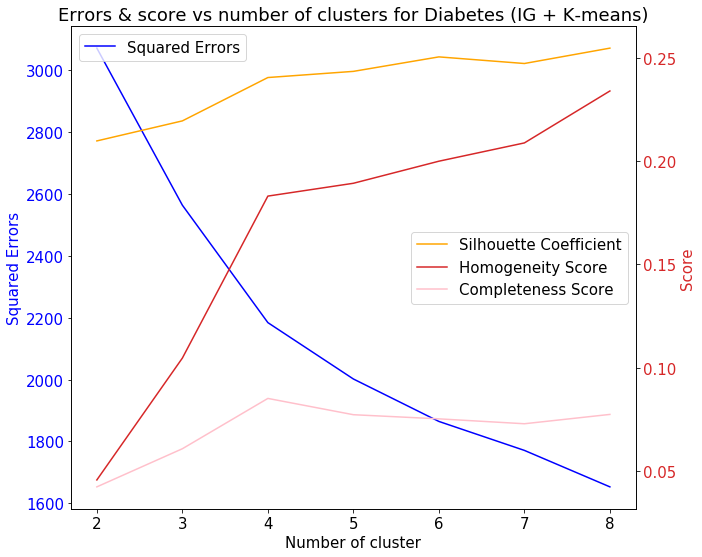

In [28]:
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score
clusters_range = list(range(2,9,1))
comp = 6
ig = SelectKBest(chi2, k=comp).fit(diabetesX, diabetesY)
diabetes_ig_7 = ig.transform(diabetesX)
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(diabetes_ig_7)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(diabetes_ig_7, k_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, k_label)
    com_score = completeness_score(diabetesY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(com_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (IG + K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## phishing

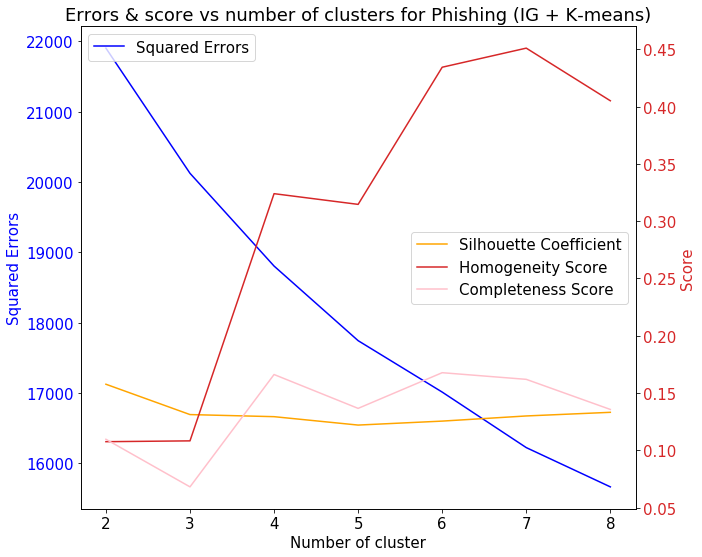

In [33]:
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score
clusters_range = list(range(2,9,1))
comp = 13
ig = SelectKBest(chi2, k=comp).fit(phishingX, phishingY)
phishing_ig_13 = ig.transform(phishingX)
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(phishing_ig_13)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(phishing_ig_13, k_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, k_label)
    com_score = completeness_score(phishingY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(com_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Phishing (IG + K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Dimension reduction using IG, clustering using EM

## diabetes

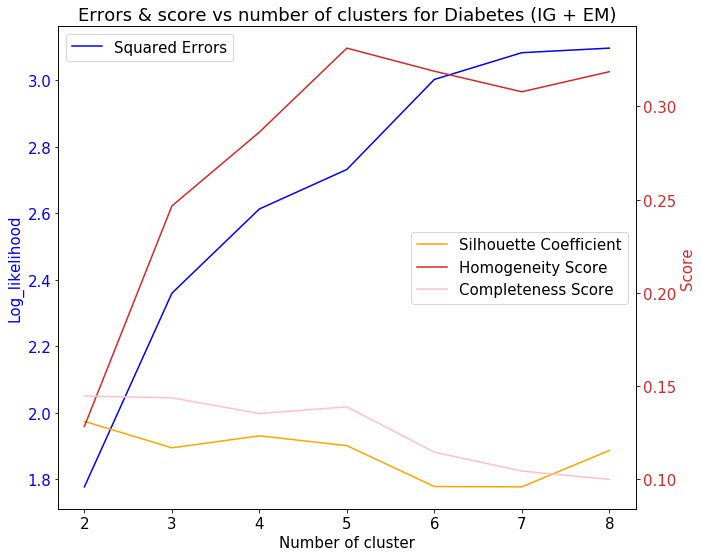

In [35]:
clusters_range = list(range(2,9,1))
comp = 6
ig = SelectKBest(chi2, k=comp).fit(diabetesX, diabetesY)
diabetes_ig_7 = ig.transform(diabetesX)
log_likelihood_EM = []
silh_EM = []
homog_EM = []
CS = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(diabetes_ig_7)
    gmm_label = gmm.predict(diabetes_ig_7)
    sil_coeff = silhouette_score(diabetes_ig_7, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, gmm_label)
    comp_score = completeness_score(diabetesY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    CS.append(comp_score)
    log_likelihood_EM.append(gmm.score(diabetes_ig_7))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Log_likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (IG + EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## phishing

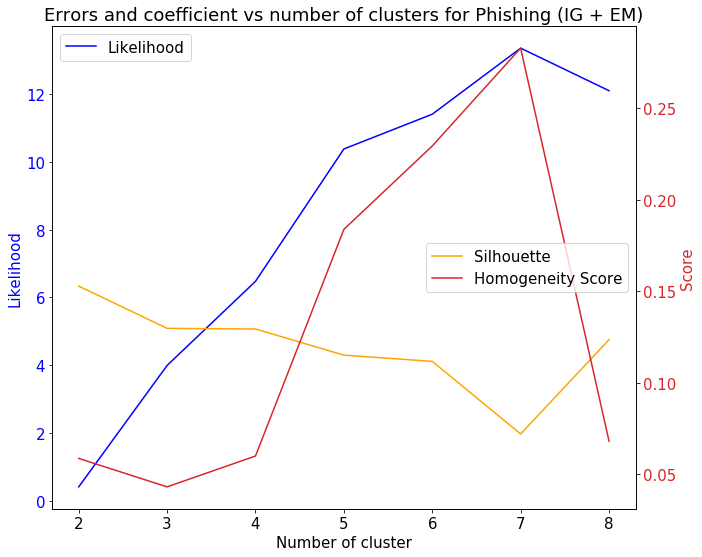

In [36]:
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score
clusters_range = list(range(2,9,1))
comp = 13
ig = SelectKBest(chi2, k=comp).fit(phishingX, phishingY)
phishing_ig_13 = ig.transform(phishingX)
log_likelihood_EM = []
silh_EM = []
homog_EM = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(phishing_ig_13)
    gmm_label = gmm.predict(phishing_ig_13)
    sil_coeff = silhouette_score(phishing_ig_13, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    log_likelihood_EM.append(gmm.score(phishing_ig_13))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    

# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ["Likelihood"]
labels_2 = ["Silhouette", "Homogeneity Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors and coefficient vs number of clusters for Phishing (IG + EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()